# Proyek Klasifikasi Gambar: Image Scene Classification
- **Nama:** Soraya Indah Setiani
- **Email:** sorayaindahs58@gmail.com
- **ID Dicoding:** sorayasetiani

## Import Semua Packages/Library yang Digunakan

In [1]:
# Library yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Library untuk pembangunan model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

# Untuk konversi model
!pip install tensorflowjs
!tensorflowjs_converter \

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
2025-04-26 13:41:07.663692: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745674867.693096     988 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:174

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.18.0


## Data Preparation

Data yang digunakan pada proyek ini adalah scene image. Scene image merupakan kumpulan gambar pemandangan, seperti bangunan, gunung, jalan, pantai, hutan, laut, dan lainnya.
Klasifikasi scene image akan mengkategorikan gambar-gambar tersebut berdasarkan karakteristik yang dimiliki.

### Data Loading

In [4]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sorayaindahsetiani","key":"67a0b850057b8ecf49b224edb17ad1c4"}'}

In [5]:
# Download kaggle dataset
!kaggle datasets download -d puneet6060/scene-image-classification

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [6]:
# Unzip file data train
!unzip /content/seg_train.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/mountain/7539.jpg  
  inflating: seg_train/mountain/7551.jpg  
  inflating: seg_train/mountain/7560.jpg  
  inflating: seg_train/mountain/7565.jpg  
  inflating: seg_train/mountain/7578.jpg  
  inflating: seg_train/mountain/7581.jpg  
  inflating: seg_train/mountain/7586.jpg  
  inflating: seg_train/mountain/7647.jpg  
  inflating: seg_train/mountain/7652.jpg  
  inflating: seg_train/mountain/7654.jpg  
  inflating: seg_train/mountain/7662.jpg  
  inflating: seg_train/mountain/767.jpg  
  inflating: seg_train/mountain/7672.jpg  
  inflating: seg_train/mountain/7679.jpg  
  inflating: seg_train/mountain/7681.jpg  
  inflating: seg_train/mountain/7693.jpg  
  inflating: seg_train/mountain/7695.jpg  
  inflating: seg_train/mountain/7698.jpg  
  inflating: seg_train/mountain/7700.jpg  
  inflating: seg_train/mountain/771.jpg  
  inflating: seg_train/mountain/7715.jpg  
  inflating: seg_train/mountain/7744.jpg  
  inf

In [7]:
# Unzip file data test
!unzip /content/seg_test.zip

Archive:  /content/seg_test.zip
   creating: seg_test/buildings/
  inflating: seg_test/buildings/20057.jpg  
  inflating: seg_test/buildings/20060.jpg  
  inflating: seg_test/buildings/20061.jpg  
  inflating: seg_test/buildings/20064.jpg  
  inflating: seg_test/buildings/20073.jpg  
  inflating: seg_test/buildings/20074.jpg  
  inflating: seg_test/buildings/20078.jpg  
  inflating: seg_test/buildings/20083.jpg  
  inflating: seg_test/buildings/20094.jpg  
  inflating: seg_test/buildings/20096.jpg  
  inflating: seg_test/buildings/20113.jpg  
  inflating: seg_test/buildings/20131.jpg  
  inflating: seg_test/buildings/20140.jpg  
  inflating: seg_test/buildings/20177.jpg  
  inflating: seg_test/buildings/20186.jpg  
  inflating: seg_test/buildings/20206.jpg  
  inflating: seg_test/buildings/20207.jpg  
  inflating: seg_test/buildings/20218.jpg  
  inflating: seg_test/buildings/20228.jpg  
  inflating: seg_test/buildings/20231.jpg  
  inflating: seg_test/buildings/20241.jpg  
  inflating

In [8]:
import os
import shutil

In [9]:
# Direktori awal untuk train dan test
train_dir = "sceneimage/seg_train"
test_dir = "sceneimage/seg_test"

# Direktori baru untuk dataset gabungan
combined_dir = "sceneimage/dataset"

In [10]:
# Direktori baru untuk dataset gabungan
combined_dir = "sceneimage/dataset"
# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)

In [13]:
# Salin file dan folder dari train
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

In [14]:
# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)

In [15]:
# Salin file dan folder dari train
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

### Dataset Checking

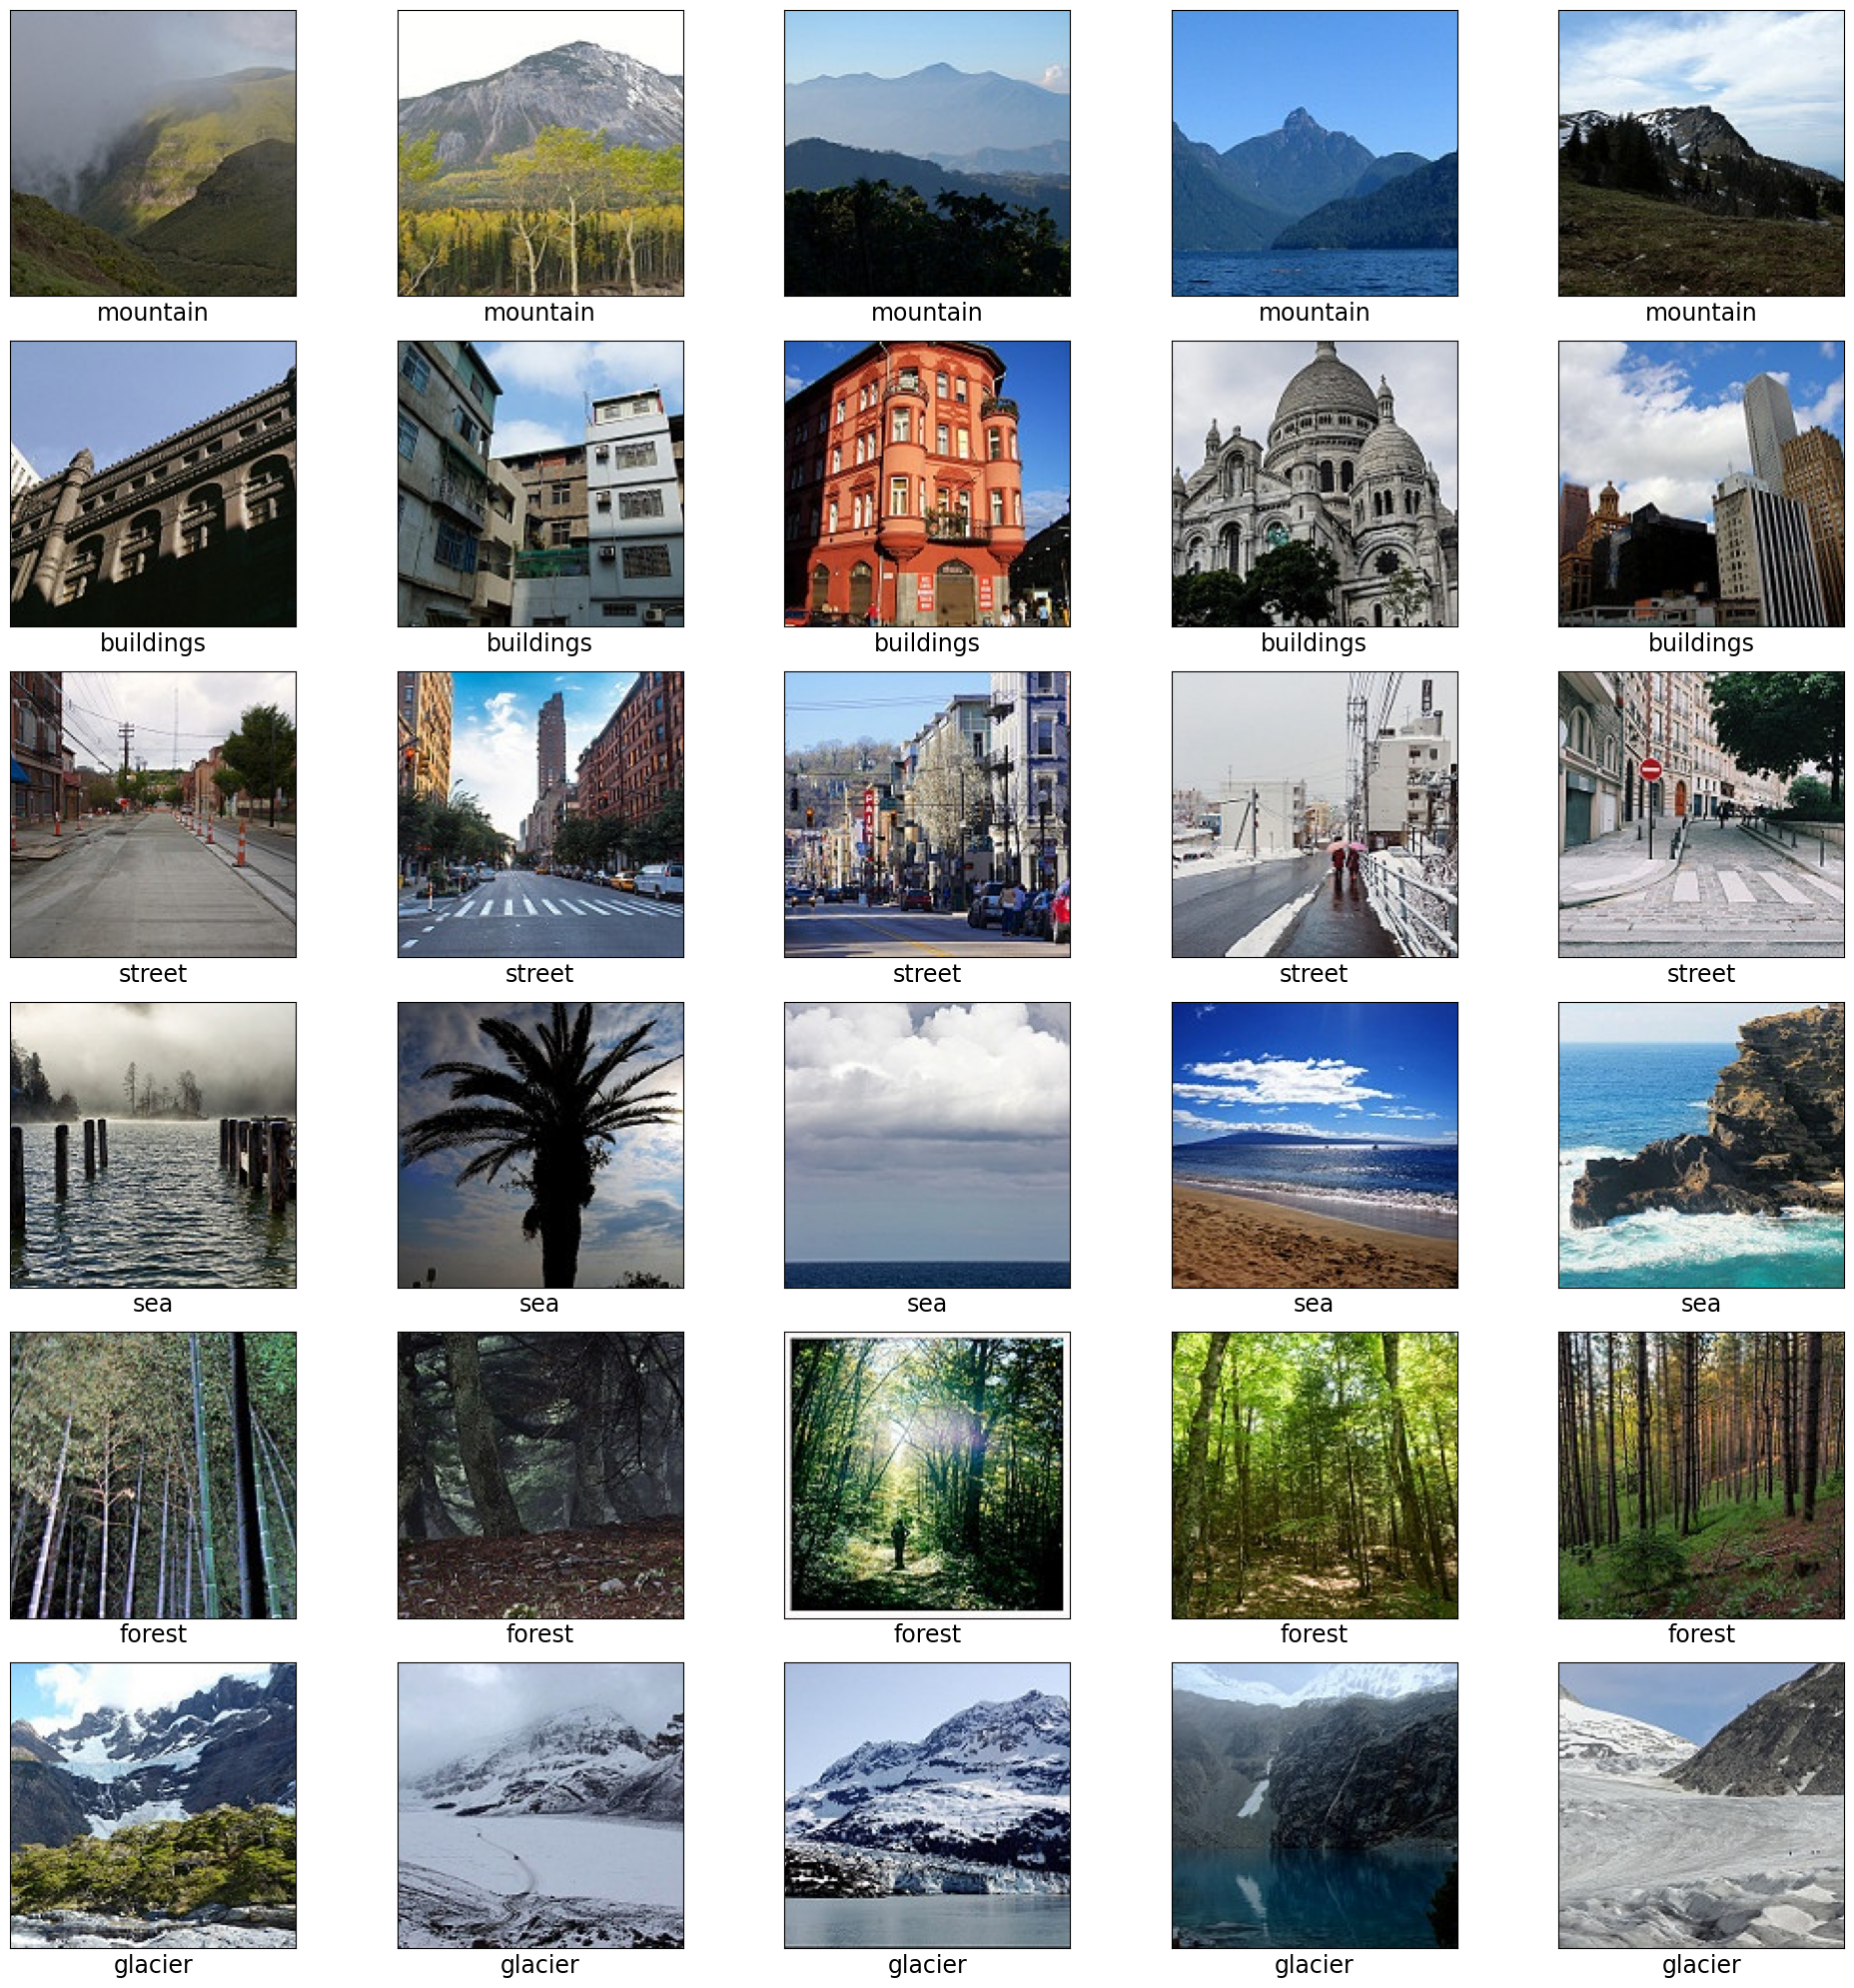

In [16]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
scene_image = {}

# Path sumber train untuk scene Image
path = "sceneimage/dataset/"
categories = os.listdir(path)

# Mengisi kamus dengan gambar dari setiap kategori
for category in categories:
    category_path = os.path.join(path, category)
    scene_image[category] = os.listdir(category_path)

# Menampilkan secara acak 5 gambar di bawah setiap kelas dari data
fig, axs = plt.subplots(len(scene_image.keys()), 5, figsize=(20, 20))

# Menampilkan 5 gambar acak untuk setiap kategori
for i, class_name in enumerate(categories):
    images = np.random.choice(scene_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path, class_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set_xlabel(class_name, fontsize=17)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])

fig.tight_layout()  # Menyusun layout agar tidak tumpang tindih
plt.show()

Data scene image memiliki 6 fitur, yaitu

a) Mountain berisi gambar pegunungan.

b) Buildings berisi gambar bangunan.

c) Street berisi gambar jalan.

d) Sea yang berisi gambar daerah pantai atau laut.

e) Forest berisi gambar hutan dan pepohonan.

f) Berisi gambar gletser es.

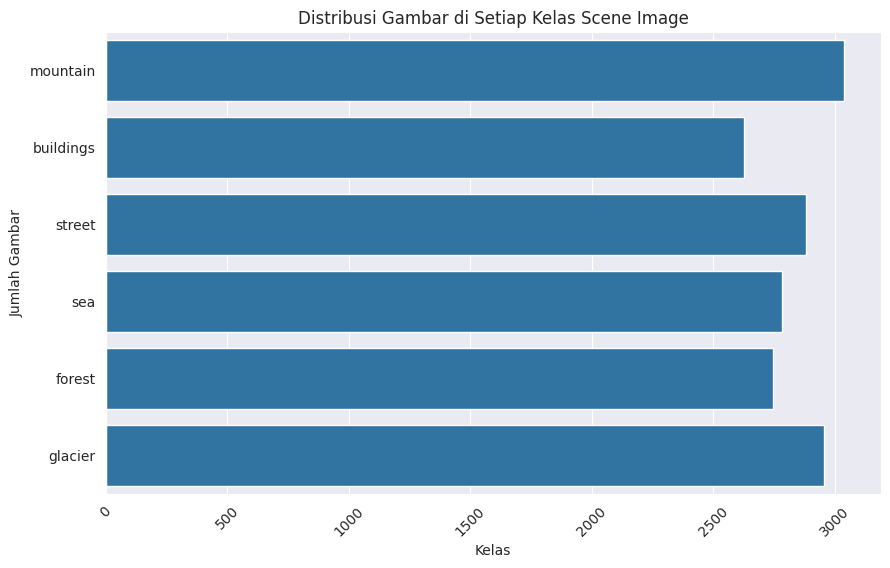

In [17]:
# Membuat plot distribusi
scene_image_path = "sceneimage/dataset/"
file_name = []
labels = []
full_path = []

for path, subdirs, files in os.walk(scene_image_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)
distribution_train = pd.DataFrame({"path": full_path, 'file_name': file_name, "labels": labels})

# Plot distribusi gambar di setiap kelas
Label = distribution_train['labels']
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

plt.title('Distribusi Gambar di Setiap Kelas Scene Image')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)  # Rotasi label kelas agar lebih mudah dibaca
plt.show()

Plot di atas menunjukkan jumlah gambar di masing-masing fitur. Terlihat masing-masing fitur jumlahnya tidak terlalu jauh, meskipun secara visual fitur mountain tampak signifikan dibandingkan fitur lain.

### Data Preprocessing

### Data Augmentation

In [18]:
# Fungsi untuk melakukan rotasi berlawanan arah jarum jam
def anticlockwise_rotation(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi ke RGB
    img = cv2.resize(img, (150, 150))  # Ukuran gambar yang lebih kecil
    sudut = random.randint(0, 180)  # Pilih sudut secara acak
    return rotate(img, sudut)

# Fungsi untuk melakukan rotasi searah jarum jam
def clockwise_rotation(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    sudut = random.randint(0, 180)
    return rotate(img, -sudut)

# Fungsi untuk membalik gambar secara vertikal (atas ke bawah)
def flip_up_down(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    return np.flipud(img)

# Fungsi untuk menambah kecerahan gambar
def add_brightness(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    img = adjust_gamma(img, gamma=0.5, gain=1)  # Menyesuaikan kecerahan gambar
    return img

# Fungsi untuk memberikan efek blur pada gambar
def blur_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    return cv2.GaussianBlur(img, (9, 9), 0)

# Fungsi untuk memberikan efek pergeseran acak pada gambar
def sheared(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    transform = AffineTransform(shear=0.2)
    shear_image = warp(img, transform, mode="wrap")
    return shear_image

# Fungsi untuk melakukan pergeseran melengkung pada gambar
def warp_shift(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    transform = AffineTransform(translation=(0, 40))  # Pergeseran gambar
    warp_image = warp(img, transform, mode="wrap")
    return warp_image

In [19]:
# Membuat variabel transformasi yang akan menyimpan semua pre-processing yang telah dilakukan sebelumnya
transformations = {
    'rotate anticlockwise': anticlockwise_rotation,
    'rotate clockwise': clockwise_rotation,
    'warp shift': warp_shift,
    'blurring image': blur_image,
    'add brightness' : add_brightness,
    'flip up down': flip_up_down,
    'shear image': sheared
}

# Path scene image
images_base_path = "sceneimage/dataset"
# Path augmented
augmented_base_path = "sceneimage/dataset_augmented"

# Folder untuk augmented images
if not os.path.exists(augmented_base_path):
    os.makedirs(augmented_base_path)

# Folder untuk setiap kategori
categories = os.listdir(images_base_path)

# array
images = []

# Menambahkan path scene image ke array
for category in categories:
    category_path = os.path.join(images_base_path, category)
    for im in os.listdir(category_path):
        images.append(os.path.join(category_path, im))

# Variabel untuk melakukan iterasi sampai jumlah gambar yang ditentukan dalam images_to_generate
images_to_generate = 2000
i = 1

while i <= images_to_generate:
    image = random.choice(images)
    try:
        original_image = io.imread(image)
        transformed_image = None
        n = 0

        transformation_count = random.randint(1, len(transformations))

        while n <= transformation_count:
            key = random.choice(list(transformations))
            transformed_image = transformations[key](original_image)
            n += 1

        # File untuk gambar yang diaugmentasi
        class_name = image.split('/')[-2]
        new_image_path = os.path.join(augmented_base_path, class_name)

        if not os.path.exists(new_image_path):
            os.makedirs(new_image_path)

        # Menyimpan gambar yang sudah diaugmentasi
        new_image_file = f"augmented_image_{i}.jpg"
        transformed_image = img_as_ubyte(transformed_image)
        cv2.imwrite(os.path.join(new_image_path, new_image_file), transformed_image)

        i += 1
    except ValueError as e:
        print(f"Could not read the {image}: {e}, hence skipping it.")

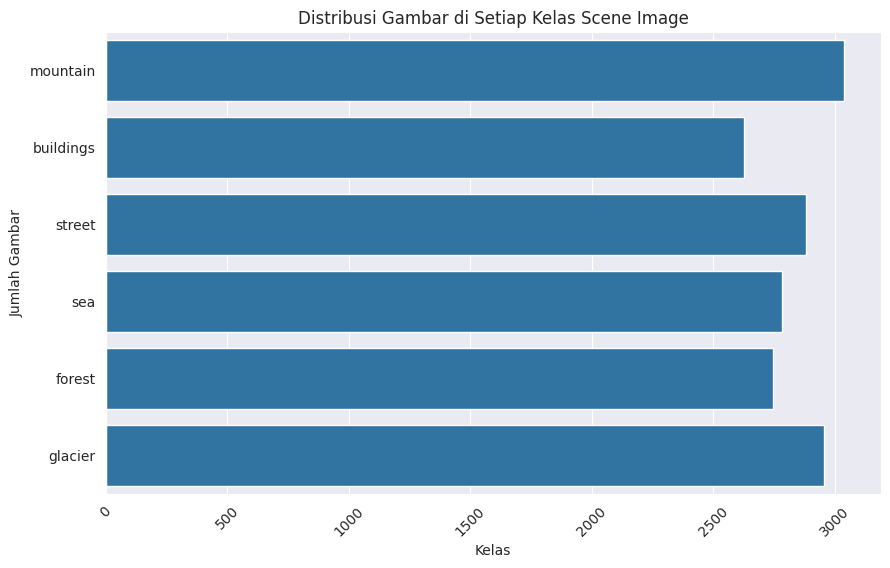

In [20]:
# Plot setelah data augmentation
scene_image_path = "sceneimage/dataset/"

file_name = []
labels = []
full_path = []

for path, subdirs, files in os.walk(scene_image_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path": full_path, 'file_name': file_name, "labels": labels})

# Plot distribusi gambar di setiap kelas
Label = distribution_train['labels']
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

plt.title('Distribusi Gambar di Setiap Kelas Scene Image')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.show()

Plot di atas menunjukkan bahwa setelah dilakukan augmentasi, jumlah gambar pada setiap atribut tidak terlihat signifikan dibandingkan dengan sebelum augmentasi. Jika dilihat menggunakan angka, sebenarnya jumlah gambar di setiap fitur memang tidak terlalu signifikan, dapat dibuktikan pada data splitting di bawah ini.

#### Split Dataset

In [21]:
mypath = 'sceneimage/dataset'

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

# Memasukkan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapi
df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})

# Melihat jumlah data gambar pada masing-masing label
df.groupby(['labels']).size()

labels
buildings    2628
forest       2745
glacier      2957
mountain     3037
sea          2784
street       2883
dtype: int64

Data training: 80%
Data testing: 20%

In [22]:
# Variabel yang digunakan pada pemisahan data ini di mana variabel x = data path dan y = data labels
X= df['path']
y= df['labels']

# Split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=300)

In [23]:
# Menyatukan ke dalam masing-masing dataframe
df_tr = pd.DataFrame({'path':X_train,'labels':y_train,'set':'train'})
df_te = pd.DataFrame({'path':X_test,'labels':y_test,'set':'test'})

In [24]:
# Menggabungkan DataFrame df_tr dan df_te
df_all = pd.concat([df_tr, df_te], ignore_index=True)

print('===================================================== \n')
print(df_all.groupby(['set', 'labels']).size(), '\n')
print('===================================================== \n')

# Cek sampel data
print(df_all.sample(5))

# Memanggil dataset asli yang berisi keseluruhan data gambar yang sesuai dengan labelnya
datasource_path = "sceneimage/dataset/"

# Membuat variabel Dataset, tempat menampung data yang telah dilakukan pembagian data training dan testing
dataset_path = "Dataset-Final/"


set    labels   
test   buildings     506
       forest        536
       glacier       608
       mountain      612
       sea           565
       street        580
train  buildings    2122
       forest       2209
       glacier      2349
       mountain     2425
       sea          2219
       street       2303
dtype: int64 


                                      path   labels    set
1654    sceneimage/dataset/forest/5840.jpg   forest  train
64     sceneimage/dataset/forest/11806.jpg   forest  train
4807      sceneimage/dataset/sea/17410.jpg      sea  train
7910      sceneimage/dataset/sea/15185.jpg      sea  train
8510  sceneimage/dataset/glacier/20355.jpg  glacier  train


In [25]:
for index, row in tq(df_all.iterrows()):
    # Deteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['labels'],row['image'].split('.')[0])

    # Membuat direktori tujuan folder
    if os.path.exists(os.path.join(dataset_path,row['set'],row['labels'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['labels']))

    # Tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['labels'],destination_file_name)

    # Salin file dari sumber ke tujuan
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

## Modelling

### Image Data Generator

In [26]:
TRAIN_DIR = "Dataset-Final/train/"
TEST_DIR = "Dataset-Final/test/"

train_buildings = os.path.join(TRAIN_DIR + '/buildings')
train_forest = os.path.join(TRAIN_DIR + '/forest')
train_glacier = os.path.join(TRAIN_DIR + '/glacier')
train_mountain = os.path.join(TRAIN_DIR + '/mountain')
train_sea = os.path.join(TRAIN_DIR + '/sea')
train_street = os.path.join(TRAIN_DIR + '/street')

test_buildings = os.path.join(TEST_DIR + '/buildings')
test_forest = os.path.join(TEST_DIR + '/forest')
test_glacier = os.path.join(TEST_DIR + '/glacier')
test_mountain = os.path.join(TEST_DIR + '/mountain')
test_sea = os.path.join(TEST_DIR + '/sea')
test_street = os.path.join(TEST_DIR + '/street')

print("Total number of buildings images in training set: ",len(os.listdir(train_buildings)))
print("Total number of forest images in training set: ",len(os.listdir(train_forest)))
print("Total number of glacier images in training set: ",len(os.listdir(train_glacier)))
print("Total number of mountain images in training set: ",len(os.listdir(train_mountain)))
print("Total number of sea images in training set: ",len(os.listdir(train_sea)))
print("Total number of street images in training set: ",len(os.listdir(train_street)))

print("Total number of buildings images in testing set: ",len(os.listdir(test_buildings)))
print("Total number of forest images in testing set: ",len(os.listdir(test_forest)))
print("Total number of glacier images in testing set: ",len(os.listdir(test_glacier)))
print("Total number of mountain images in testing set: ",len(os.listdir(test_mountain)))
print("Total number of sea images in testing set: ",len(os.listdir(test_sea)))
print("Total number of street images in testing set: ",len(os.listdir(test_street)))

Total number of buildings images in training set:  2122
Total number of forest images in training set:  2209
Total number of glacier images in training set:  2349
Total number of mountain images in training set:  2425
Total number of sea images in training set:  2219
Total number of street images in training set:  2303
Total number of buildings images in testing set:  506
Total number of forest images in testing set:  536
Total number of glacier images in testing set:  608
Total number of mountain images in testing set:  612
Total number of sea images in testing set:  565
Total number of street images in testing set:  580


In [27]:
# Buat objek ImageDataGenerator yang menormalkan gambar
datagen = ImageDataGenerator(rescale=1/255.,
                             validation_split = 0.2)

train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=32,
    target_size=(150, 150),
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=32,
    target_size=(150, 150),
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    batch_size=1,
    target_size=(150, 150),
    class_mode='categorical',
    shuffle=False
)

Found 10905 images belonging to 6 classes.
Found 2722 images belonging to 6 classes.
Found 3407 images belonging to 6 classes.




*   ImageDataGenerator untuk menormalkan gambar dengan mengubah rentang piksel [0, 255] menjadi [0, 1] dengan membagi nilai piksel dengan 255.
*   Pada train_generator, data dari TRAIN_DIR diubah ukuran menjadi 150x150 piksel dan dimasukkan ke bach dengan ukuran 32 gambar per bach.


### Skema CNN Architecture dengan 32 Neurons pada Conv Layer

In [28]:
model_1 = Sequential()

# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,3)))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# Menambahkan layer baru setelah layer konvolusional yang ada
model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_1.add(MaxPool2D((2, 2)))

model_1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_1.add(MaxPool2D((2, 2)))

# GlobalAveragePooling2D
model_1.add(GlobalAveragePooling2D())

# 1st Dense Layer
model_1.add(Dense(128, activation='relu'))

# 1st Dropout Layer
model_1.add(Dropout(0.5))

# 2nd Dense Layer
model_1.add(Dense(64, activation='relu'))

# 2nd Dropout Layer
model_1.add(Dropout(0.3))

# Final Dense layer untuk 6 kategori
model_1.add(Dense(6, activation='softmax'))

######################### Compile Model ##################################
model_1.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# Summary
print(model_1.summary())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,414 (724.27 KB)

 Trainable params: 185,222 (723.52 KB)

 Non-trainable params: 192 (768.00 B)

None


*   Layer konvolusional 1: menggunakan 32 filter dengan ukuran (3, 3), serta gambar yang digunakan adalah gambar RGB dengan ukuran (150, 150, 3)
*   Layer konvolusional 2: menggunakan 32 filter dengan ukuran (4, 4)
*   Layer konvolusional 3: menggunakan 32 filter tetapi dengan ukuran yang lebih besar (7, 7)
*   Layer konvolusional 4: menggunakan 64 dengan ukuran (3, 3).
*   Layer konvolusional 5: menggunakan 128 filter dengan ukuran (3, 3).
*   `MaxPooling` dengan ukuran (2, 2),berfungsi untuk mengurangi dimensi data dan menjaga fitur penting yang telah diekstraksi dengan memilih nilai maksimum.
*    `GlobalAveragePooling2D` untuk mereduksi dimensi lebih lanjut, serta mengurangi jumlah parameter dan membantu menghindari overfitting.
*   lapisan Dense akan melakukan klasifikasi berdasarkan fitur yang telah diekstraksi.
*   Optimizer yang digunakan adalah RMSprop karena efektif untuk model CNN.
*   Menggunakan `categorical_crossentropy` karena scene image terdiri lebih dari 2 fitur.















In [29]:
count_buildings, count_forest, count_glacier, count_mountain, count_sea, count_street = len(os.listdir(train_buildings)), len(os.listdir(train_forest)), len(os.listdir(train_glacier)), len(os.listdir(train_mountain)), len(os.listdir(train_sea)),  len(os.listdir(train_street))
total_images = count_buildings + count_forest + count_glacier + count_mountain + count_sea + count_street

# Menghitung bobot untuk setiap kelas
weight_buildings = (1 / count_buildings) * (total_images / 6.0)
weight_forest = (1 / count_forest) * (total_images / 6.0)
weight_glacier = (1 / count_glacier) * (total_images / 6.0)
weight_mountain = (1 / count_mountain) * (total_images / 6.0)
weight_sea = (1 / count_sea) * (total_images / 6.0)
weight_street = (1 / count_street) * (total_images / 6.0)

# Menyimpan bobot kelas dalam dictionary
class_weights = {
    0: weight_buildings,
    1: weight_forest,
    2: weight_glacier,
    3: weight_mountain,
    4: weight_sea,
    5: weight_street
}

# Menampilkan bobot kelas untuk verifikasi
print(f"Class Weights: {class_weights}")
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Fitting / training model
history_1 = model_1.fit(
    train_generator,
    epochs=50,
    batch_size=32,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[reduce_lr]
)

Class Weights: {0: 1.0702953188815583, 1: 1.0281424475629997, 2: 0.9668653327657158, 3: 0.9365635738831615, 4: 1.023509088177858, 5: 0.9861774497032856}
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


341/341 ━━━━━━━━━━━━━━━━━━━━ 34s 70ms/step - accuracy: 0.4254 - loss: 1.3752 - val_accuracy: 0.4405 - val_loss: 1.6885 - learning_rate: 0.0010
Epoch 2/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.7082 - loss: 0.8083 - val_accuracy: 0.5940 - val_loss: 1.1182 - learning_rate: 0.0010
Epoch 3/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.7649 - loss: 0.6774 - val_accuracy: 0.5434 - val_loss: 1.5039 - learning_rate: 0.0010
Epoch 4/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.8045 - loss: 0.5856 - val_accuracy: 0.8082 - val_loss: 0.5390 - learning_rate: 0.0010
Epoch 5/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.8218 - loss: 0.5383 - val_accuracy: 0.5797 - val_loss: 1.5468 - learning_rate: 0.0010
Epoch 6/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.8324 - loss: 0.4911 - val_accuracy: 0.6954 - val_loss: 1.0392 - learning_rate: 0.0010
Epoch 7/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.8509 - loss: 0.4551

Berdasarkan output di atas, dapat disimpulkan bahwa model cukup baik yang ditunjukkan adanya peningkatan akurasi yang cukup stabil. Loss yang terus berkurang dengan val_loss yang berfluktuasi seiring penurunan learning rate meunjukkan bahwa model tidak terlalu overfitting.

## Evaluasi dan Visualisasi

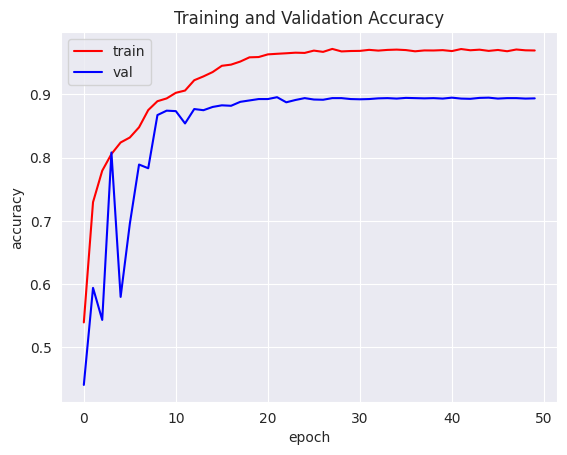

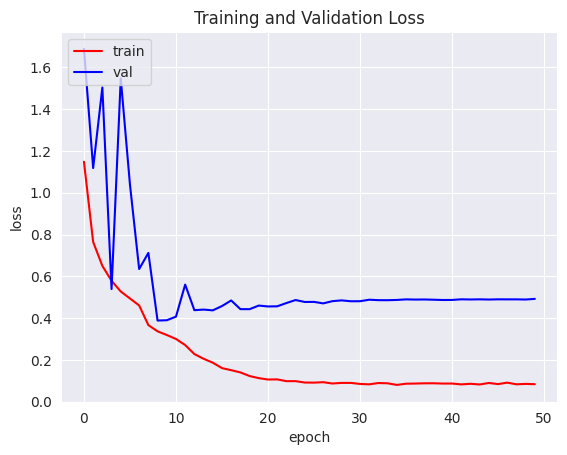

In [30]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

Interpretasi dari grafik di atas adalah

a) Training Loss (garis merah)
Turun signifikan pada awal pelatihan, mulai epoch 5-15 mulai stabil, dan mulai epoch 20 mendekati nilai yang sangat rendah. Artinya, kinerja model bail selama pelatihan.

b) Validation loss (garis biru)
Fluktuasi lebih besar dari training loss. Mulai epoch 10, validation loss mulai menurun, dan mulai epoch 30 menjadi stabil seiring peningkatan akurasi.

Dapat disimpulkan model mampu menggeneralisasi dengan baik pada data yang belum pernah dipelajari meskipun terdapat sedikit perbedaan pada training loss dan validation loss.


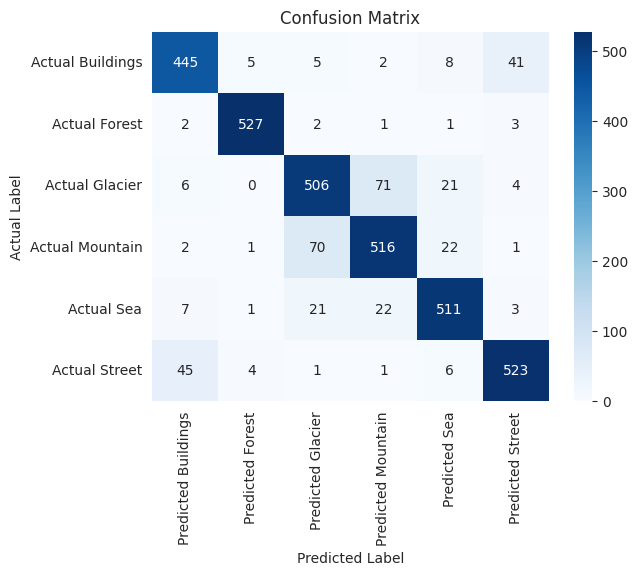


Classification Report:

              precision    recall  f1-score   support

   Buildings     0.8777    0.8794    0.8786       506
      Forest     0.9796    0.9832    0.9814       536
     Glacier     0.8364    0.8322    0.8343       608
    Mountain     0.8418    0.8431    0.8424       612
         Sea     0.8981    0.9044    0.9012       565
      Street     0.9096    0.9017    0.9056       580

    accuracy                         0.8888      3407
   macro avg     0.8905    0.8907    0.8906      3407
weighted avg     0.8887    0.8888    0.8887      3407



In [31]:
# Reset test generator
test_generator.reset()

# Prediksi model untuk data uji
preds_1 = model_1.predict(test_generator, verbose=0)

# Menggunakan argmax untuk memilih kelas dengan probabilitas tertinggi
preds_1 = np.argmax(preds_1, axis=1)

# Print Confusion Matrix
cm = pd.DataFrame(data=confusion_matrix(test_generator.classes, preds_1, labels=[0, 1, 2, 3, 4, 5]),
                  index=["Actual Buildings", "Actual Forest", "Actual Glacier", "Actual Mountain", "Actual Sea", "Actual Street"],
                  columns=["Predicted Buildings", "Predicted Forest", "Predicted Glacier", "Predicted Mountain", "Predicted Sea", "Predicted Street"])

# Visualisasi confusion matrix dengan heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true=test_generator.classes, y_pred=preds_1, target_names=['Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea', 'Street'], digits=4))

*   F-1 score tertinggi, yaitu lebih dari 98% pada Forest. Artinya, model mampu melakukan klasifikasi gambar hutan dengan akurat. Forest juga selalu tertinggi di semua metrik, sehingga forest merupakan fitur dengan kinerja terbaik.
*   Secara keseluruhan, akurasi model lebih dari 88% yang artinya model cukup baik dalam melakukan klasifikasi






## Konversi Model

### Menyimpan model dalam format SavedModel

In [32]:
save_path = 'saved_model/'
tf.saved_model.save(model_1, save_path)

### TFLite Converter untuk mengonversi model menjadi tflite model

In [33]:
# Konversi model yang disimpan dalam format SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(save_path)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model_1.tflite', 'wb') as f:
    f.write(tflite_model)

### Konversi ke model TensorFlow.js:

In [34]:
!pip install tensorflowjs
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --saved_model_tags=serve \
    saved_model/ \
    tfjs_model/

2025-04-26 13:58:56.169165: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745675936.191303    6252 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745675936.198137    6252 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-04-26 13:59:00.737510: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1745675940.737704    6252 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

In [35]:
!saved_model_cli show --dir saved_model --tag_set serve --signature_def serving_default

2025-04-26 13:59:04.333818: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745675944.469028    6316 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745675944.483300    6316 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
The given SavedModel SignatureDef contains the following input(s):
  inputs['inputs'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 150, 150, 3)
      name: serving_default_inputs:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['output_0'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 6)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [36]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_node_names='output_0' \
    --saved_model_tags=serve \
    /content/saved_model/ \
    /content/tfjs_model

2025-04-26 13:59:16.330812: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745675956.370703    6396 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745675956.381689    6396 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-04-26 13:59:26.398363: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1745675966.398592    6396 gpu_device.cc:2022] Created device /job:localhost/replica:0/task